# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [3]:
experimentN = 'exp13'

In [4]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ocr/experiment_13/exp13_ocr_Norm.csv"
ocr_normalized = pandas.read_csv(path, sep = ";")
ocr_normalized = ocr_normalized.rename(columns = {'Unnamed: 0':'Time'})
ocr_normalized = ocr_normalized.apply(lambda x: x.str.replace(',','.'))
ocr_normalized = ocr_normalized.astype(float)
print(ocr_normalized.shape)
ocr_normalized.head(2)

(15, 61)
Wall time: 31.9 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,15.73,16.34,17.40,16.32,16.08,17.96,24.71,27.94,26.29,...,29.71,25.55,27.34,27.92,19.82,23.26,20.5,20.33,18.88,19.92
1,7.76,15.07,15.91,16.22,15.68,13.09,17.31,23.64,25.94,24.49,...,28.14,25.16,26.30,26.91,18.88,23.16,20.8,19.79,18.45,19.19


In [5]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


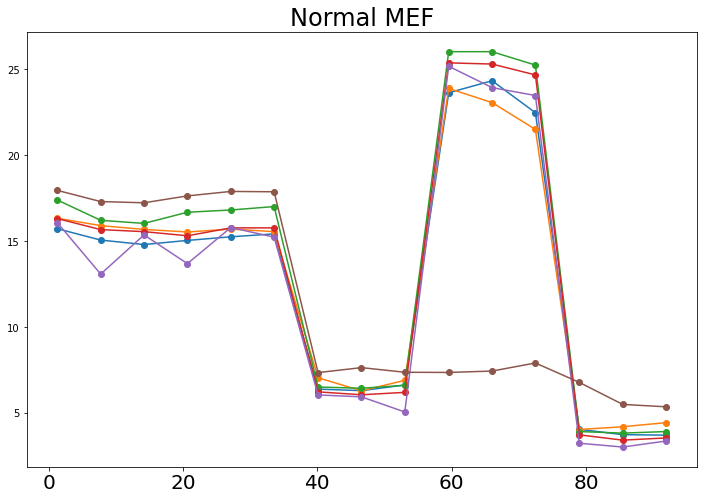

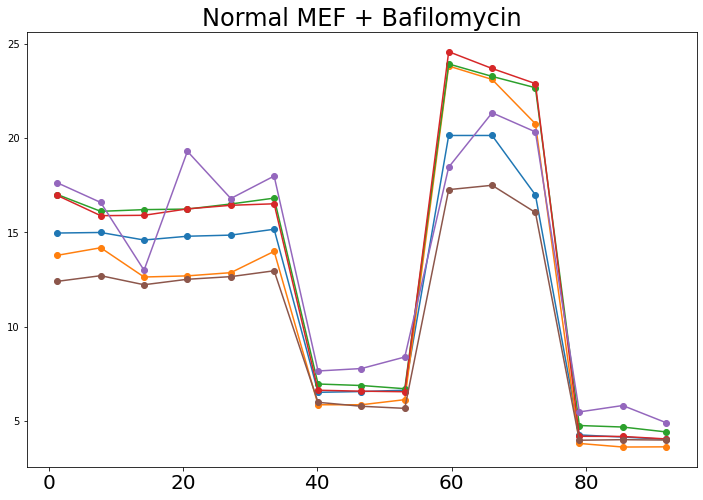

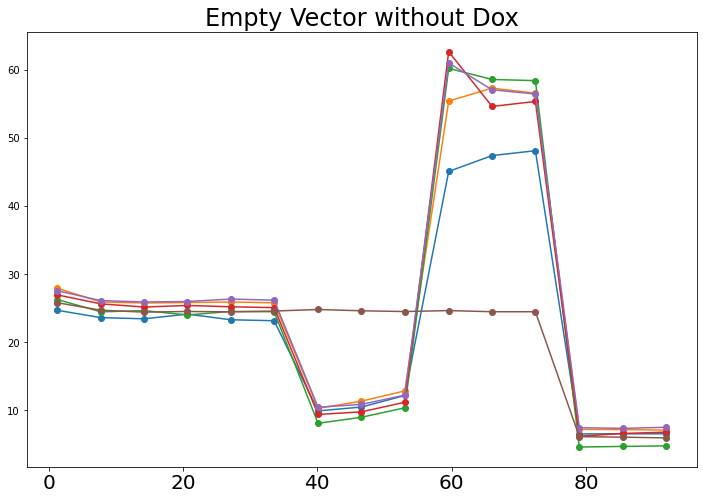

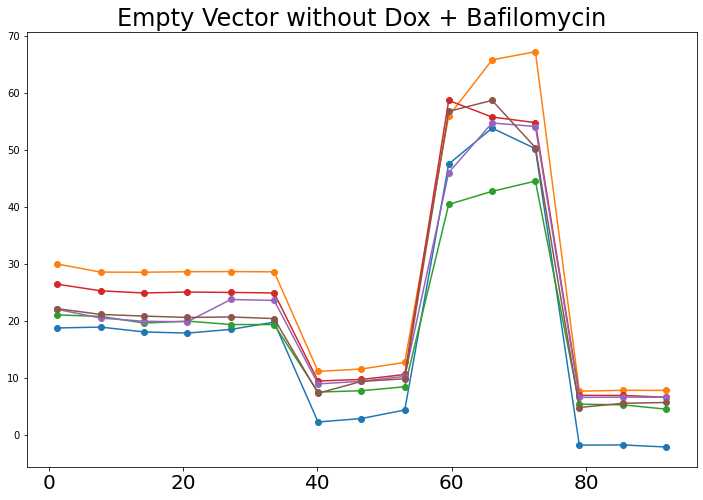

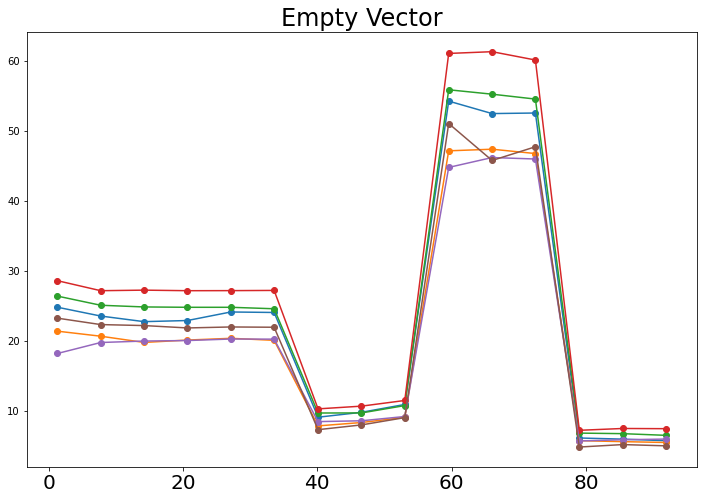

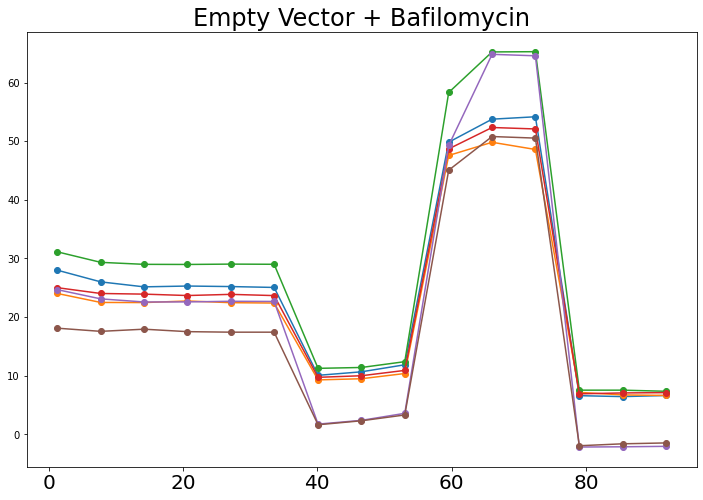

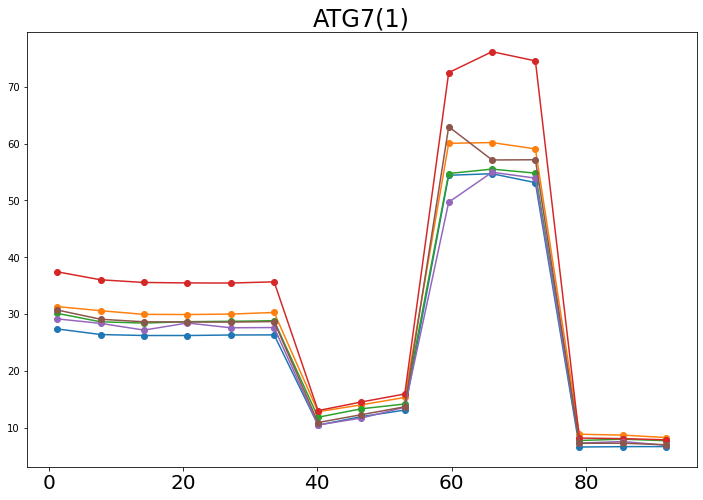

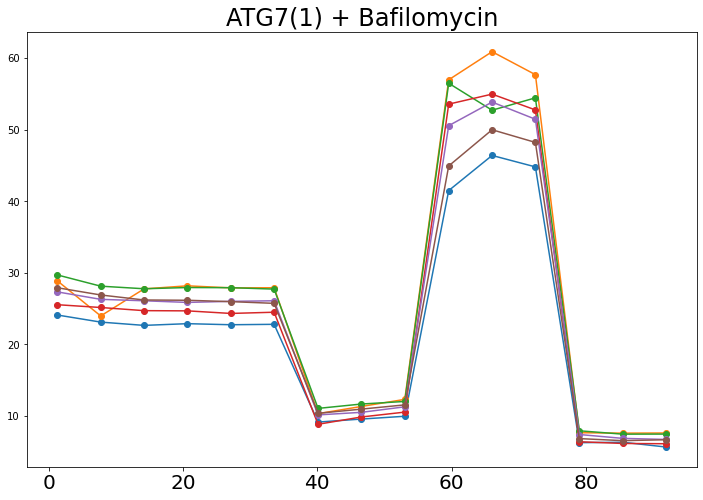

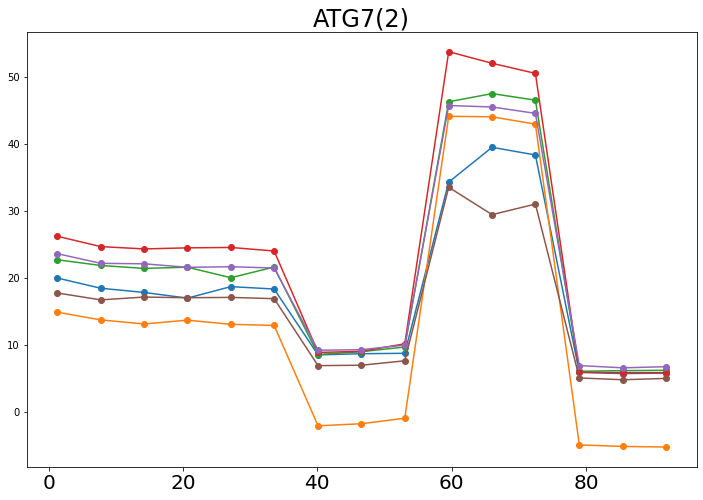

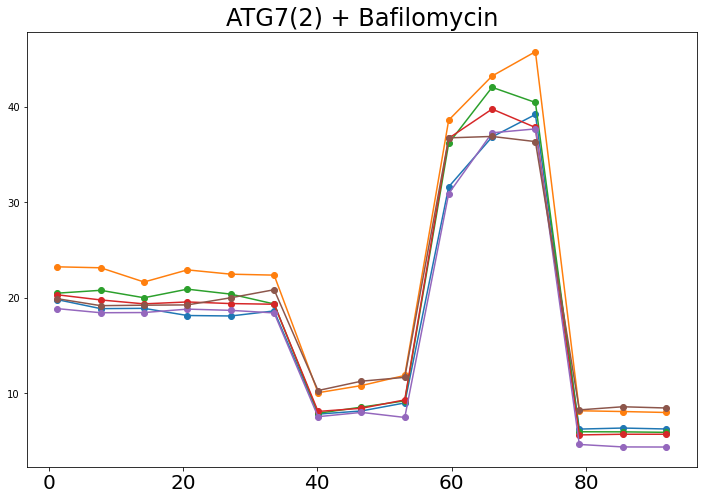

<Figure size 864x576 with 0 Axes>

In [6]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [7]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02']
ev_nodox = ['B03','C03','D03','E03','F03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


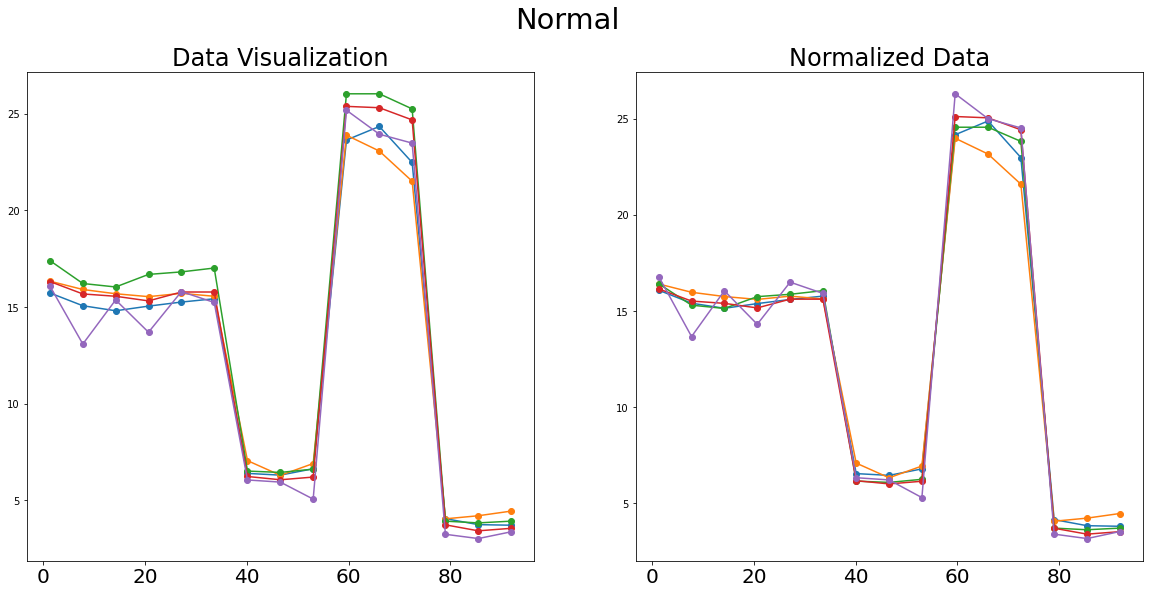

<Figure size 864x576 with 0 Axes>

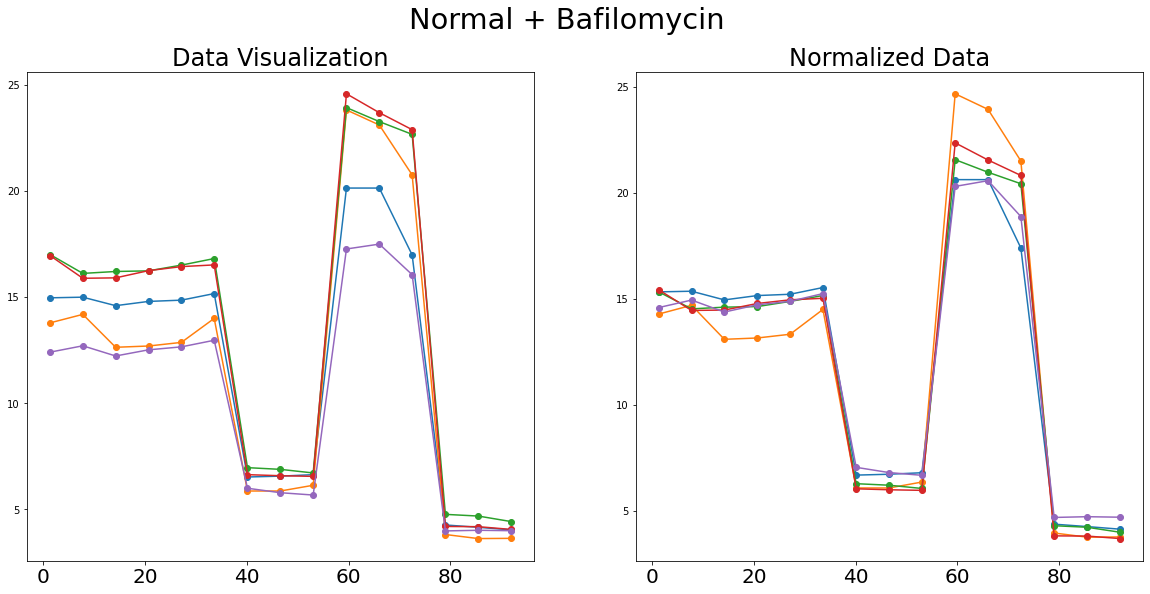

<Figure size 864x576 with 0 Axes>

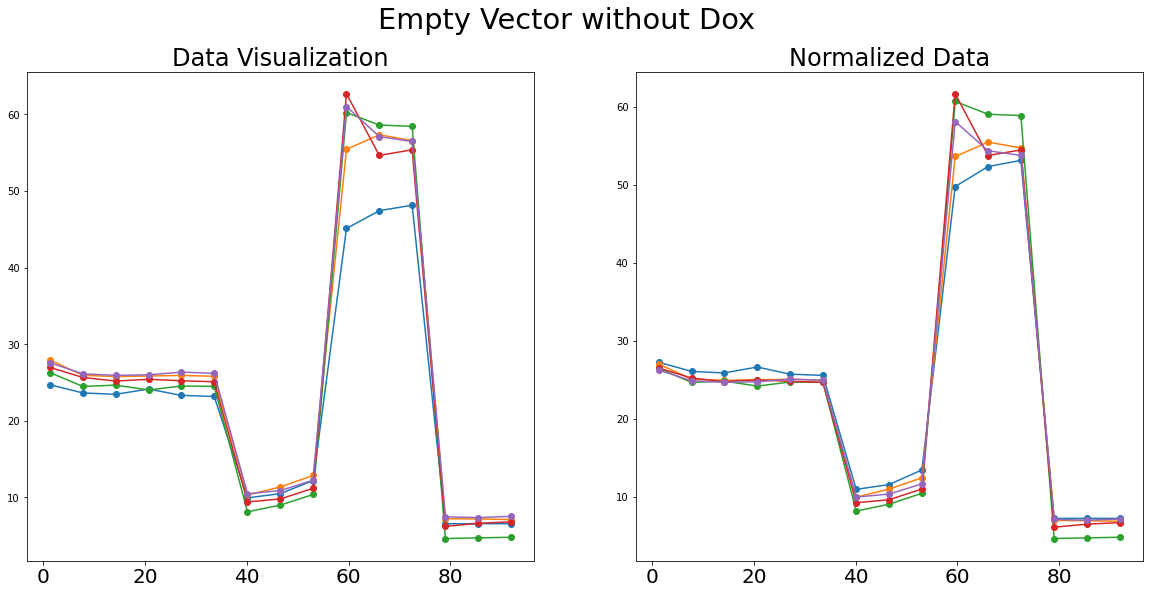

<Figure size 864x576 with 0 Axes>

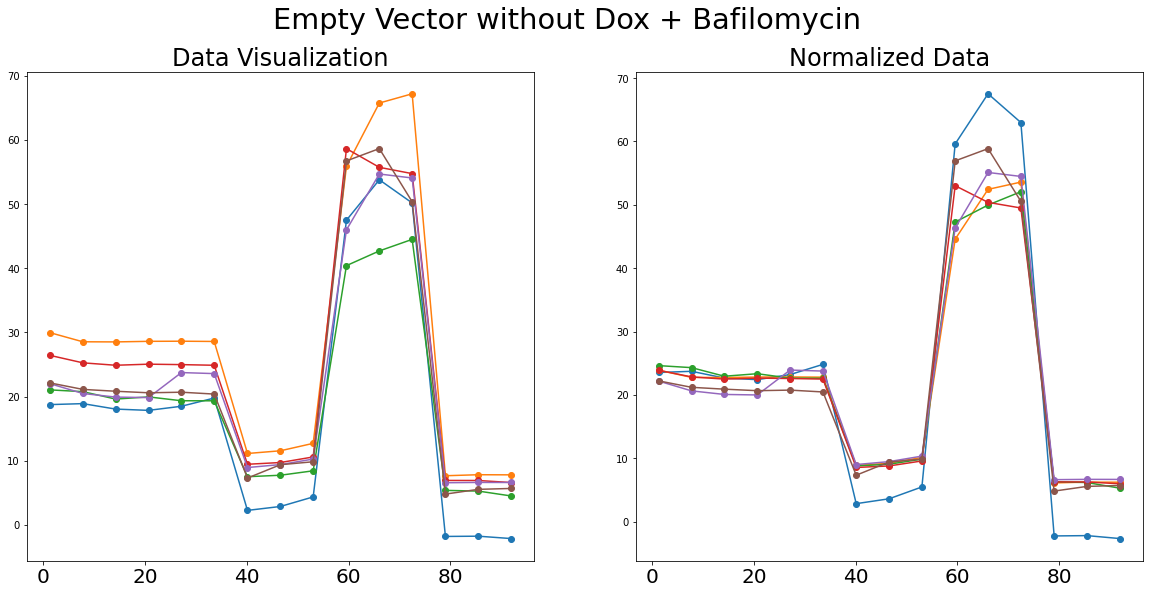

<Figure size 864x576 with 0 Axes>

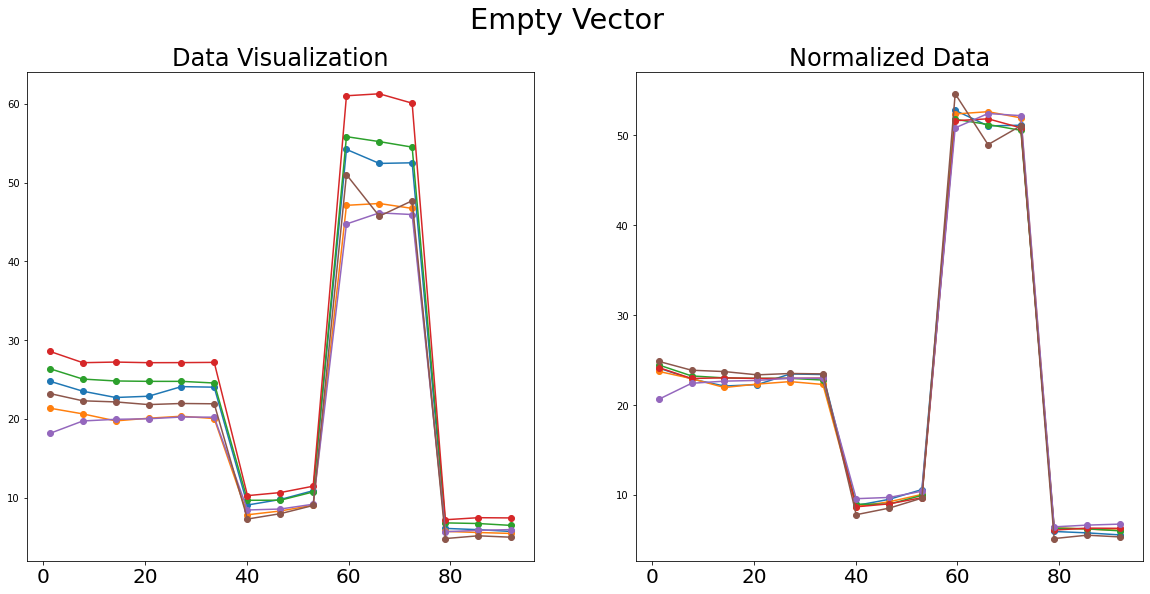

<Figure size 864x576 with 0 Axes>

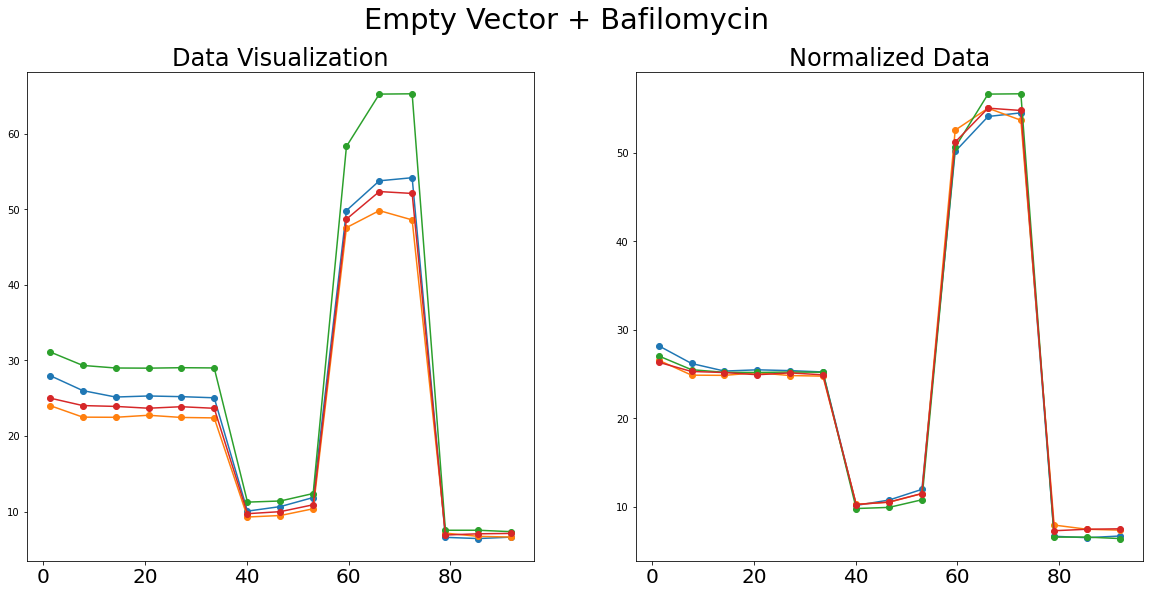

<Figure size 864x576 with 0 Axes>

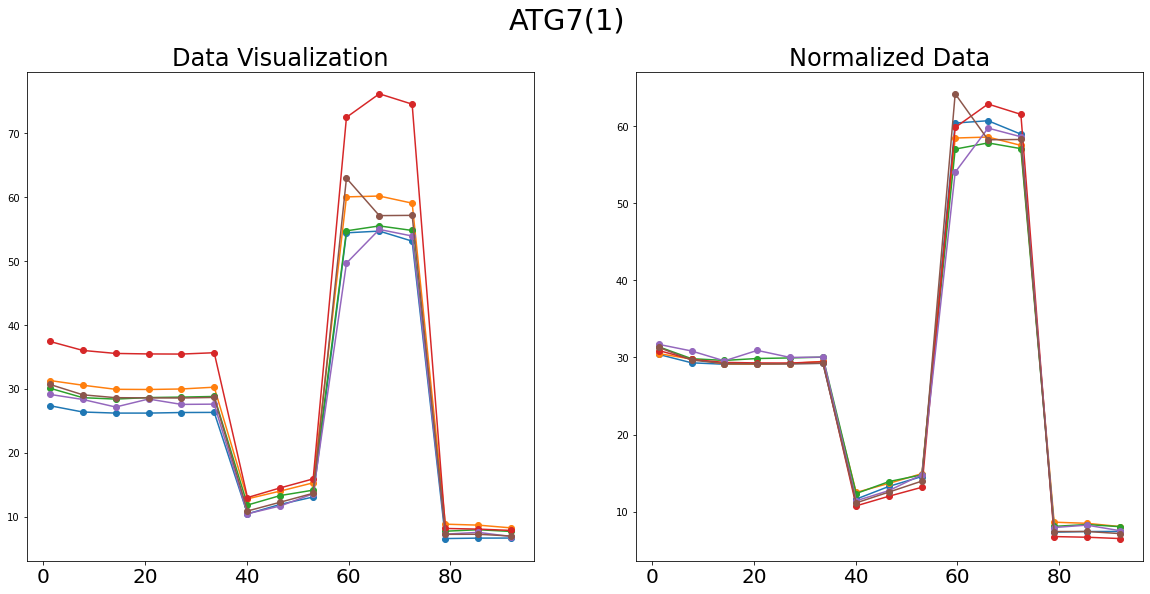

<Figure size 864x576 with 0 Axes>

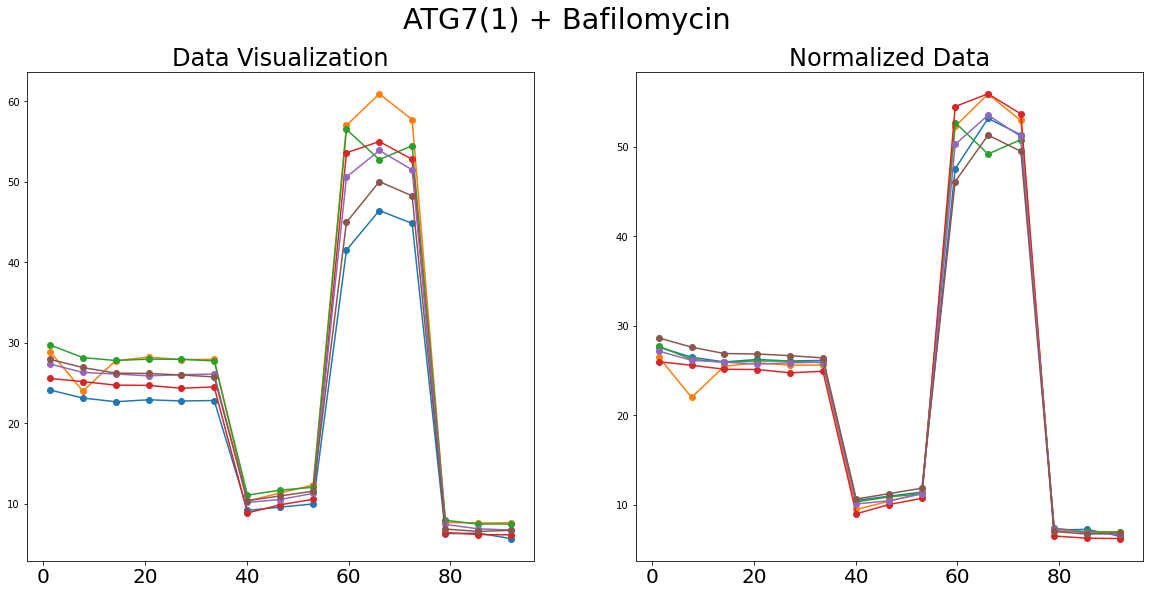

<Figure size 864x576 with 0 Axes>

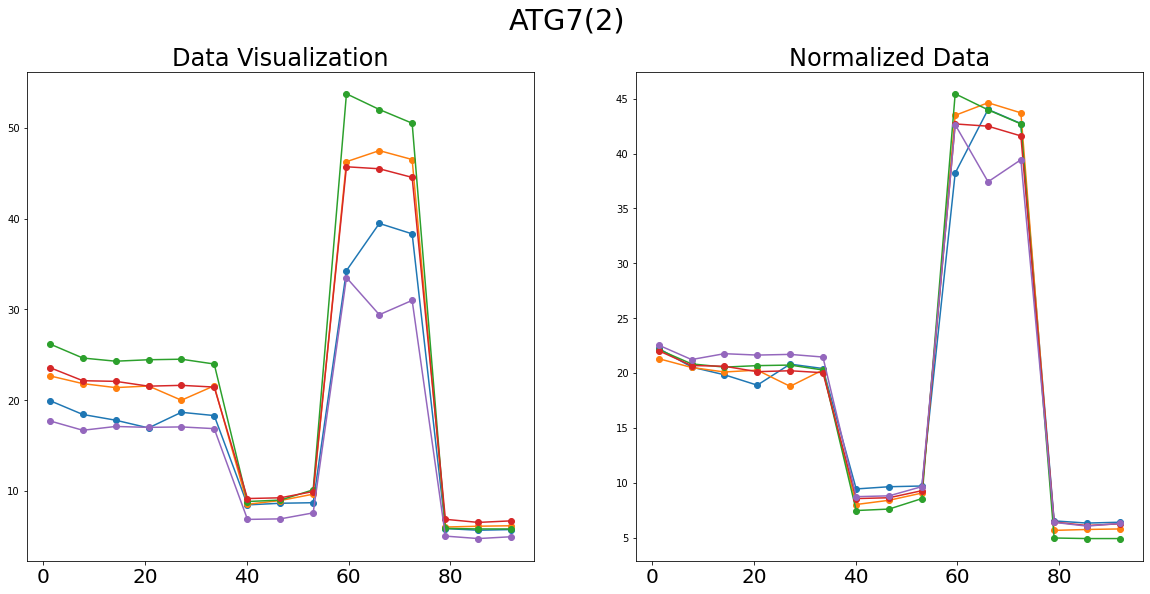

<Figure size 864x576 with 0 Axes>

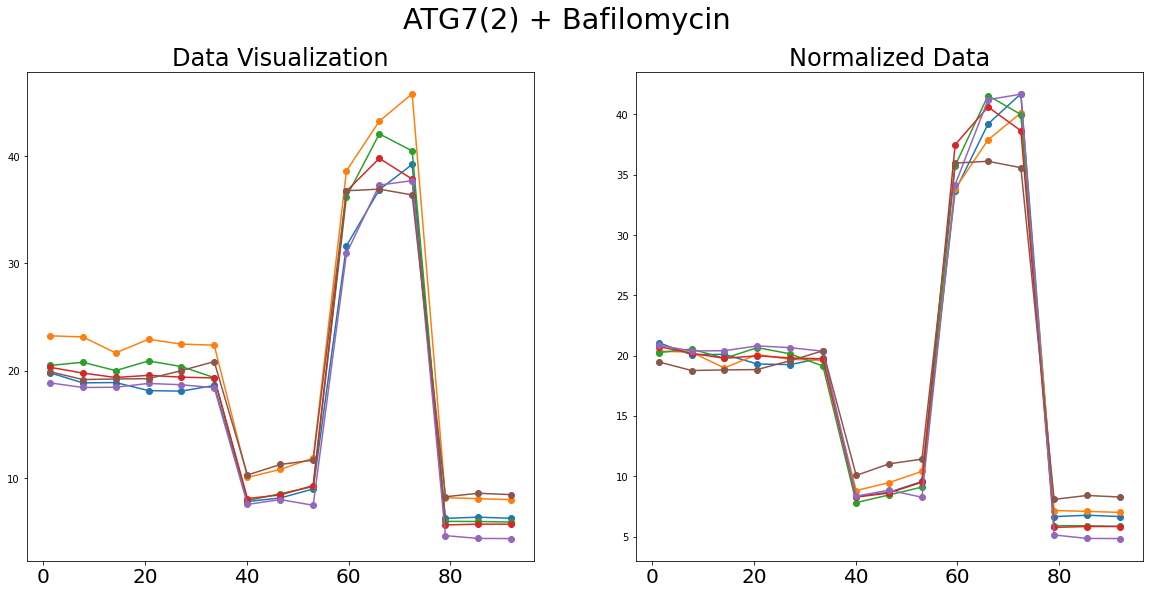

<Figure size 864x576 with 0 Axes>

In [8]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal'], [normal_baf, 'Normal + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_normalized[data[0]].mean()
    general_mean = ocr_normalized[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_normalized[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_normalized['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

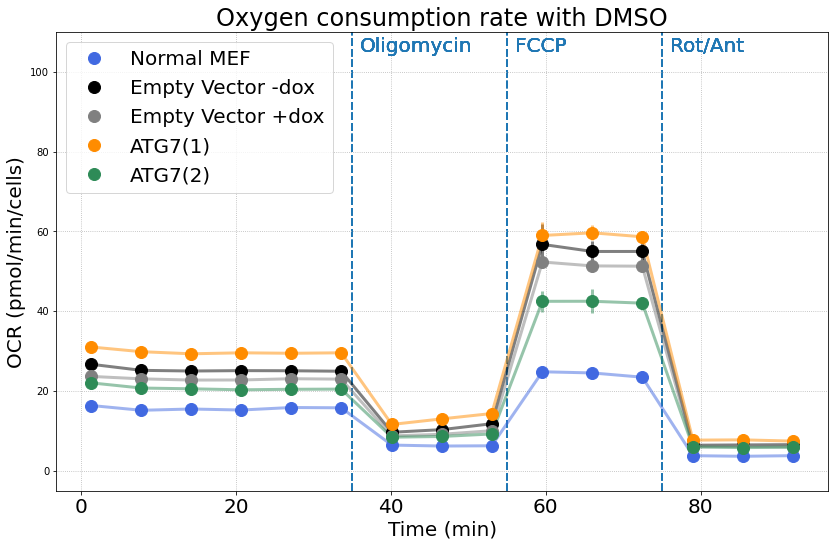

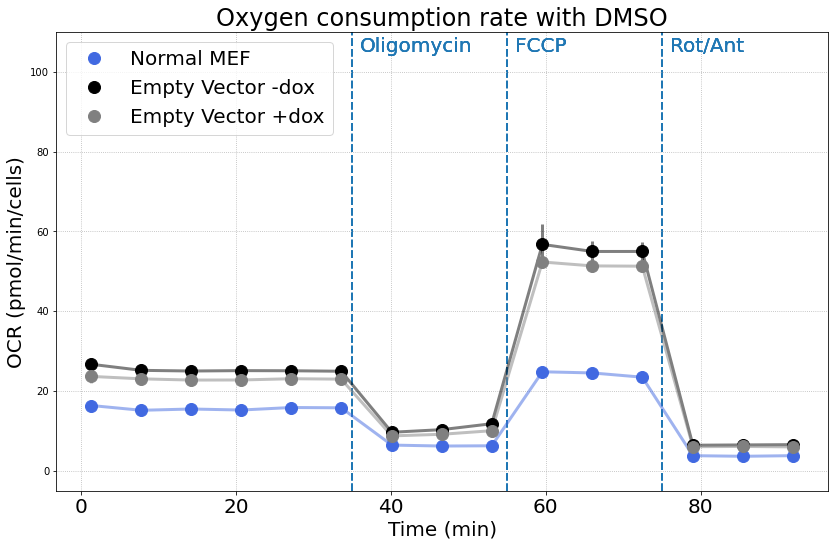

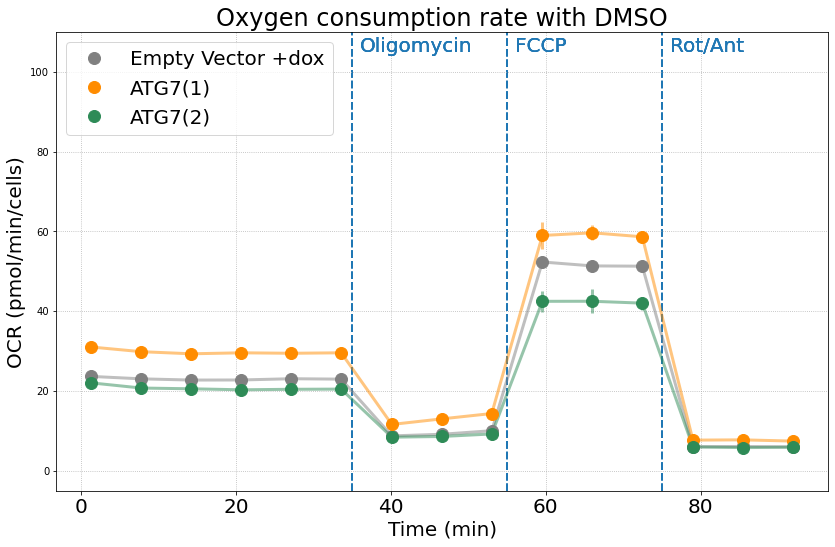

<Figure size 864x576 with 0 Axes>

In [9]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 105, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 105, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 105, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate with DMSO')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([-5, 110])
        matplotlib.pyplot.tight_layout()
        
#         # save the last graph
#         path = 'ATG7/Seahorse_results/seahorse_OCR/'
#         text_file = 'graph_represent_exp13_dmso'
#         plt.savefig(output_file_directory+path+text_file+'.svg')

    plt.show()
    plt.clf()

In [10]:
#data preparation
sample_labels = wt2, wt1, ev, ev_nodox
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_dmso_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox    ATG7(1)  ATG7(2)
0             26.698          23.745000  31.028333   22.016
1             25.174          23.066667  29.861667   20.740
2             25.004          22.770000  29.340000   20.526
3             25.090          22.786667  29.565000   20.298
4             25.076          23.093333  29.458333   20.368
5             24.958          22.993333  29.581667   20.432
   Empty Vector -dox  Empty Vector +dox    ATG7(1)  ATG7(2)
0             56.902          52.330000  59.061667   42.700
1             55.026          51.363333  59.773333   42.776
2             55.006          51.250000  58.773333   42.174


# + BAF

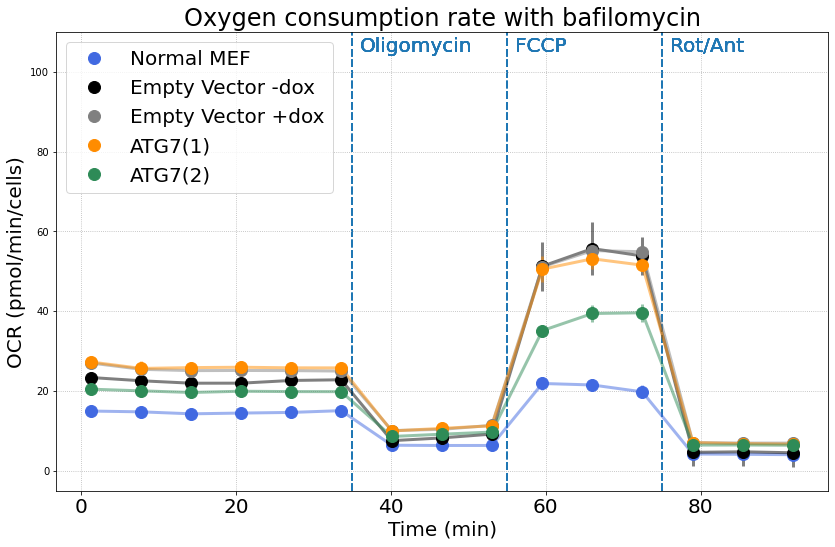

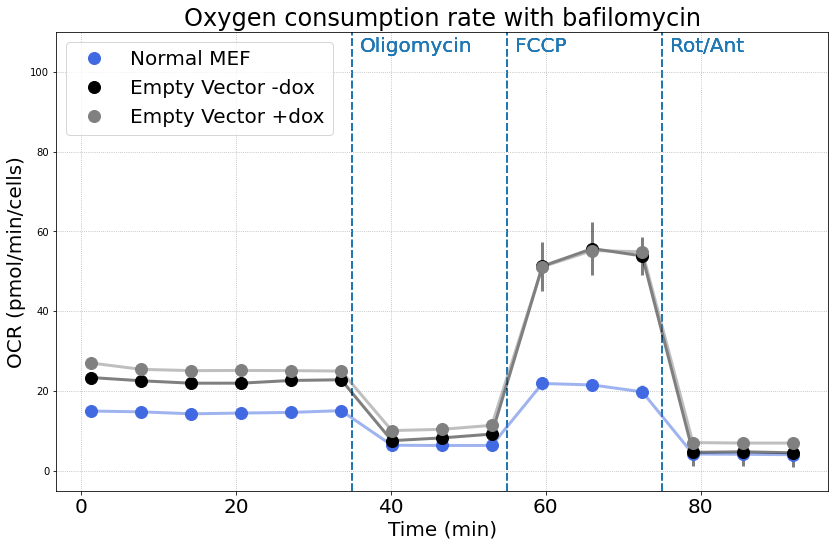

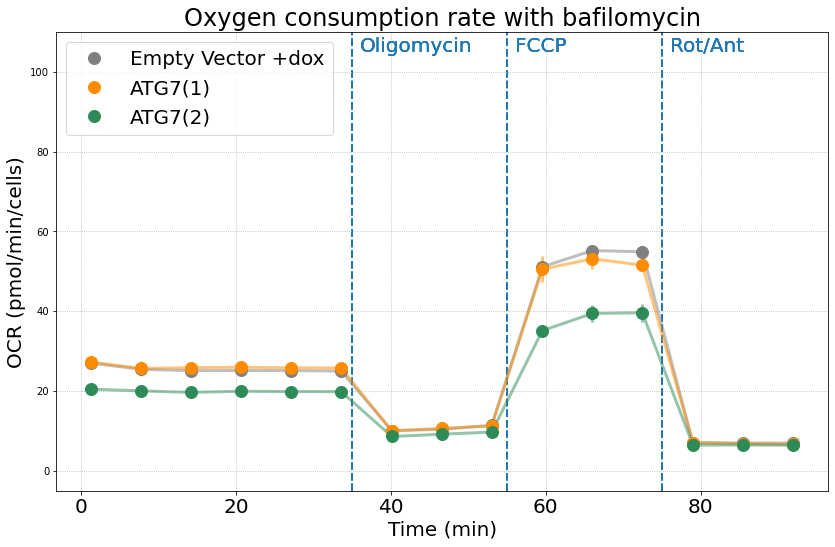

<Figure size 864x576 with 0 Axes>

In [11]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN
all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 105, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 105, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 105, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate with bafilomycin')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([-5, 110])
        matplotlib.pyplot.tight_layout()
        
#         # save the last graph
#     path = 'ATG7/Seahorse_results/seahorse_OCR/'
#     text_file = 'graph_represent_exp13_baf'
#     plt.savefig(output_file_directory+path+text_file+'.svg')
    
    plt.show()
    plt.clf()
    
            



In [12]:
#data preparation
sample_labels = wt2_baf, wt1_baf, ev_baf, ev_nodox_baf
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_baf_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox    ATG7(1)    ATG7(2)
0          23.385000            27.0350  27.251667  20.451667
1          22.511667            25.4600  25.601667  20.045000
2          21.968333            25.1300  25.871667  19.615000
3          21.981667            25.1675  25.961667  19.950000
4          22.645000            25.1375  25.818333  19.855000
5          22.758333            25.0250  25.800000  19.838333
   Empty Vector -dox  Empty Vector +dox    ATG7(1)    ATG7(2)
0          50.860000            51.0900  50.678333  35.150000
1          55.218333            55.2775  53.150000  39.366667
2          53.510000            55.0200  51.573333  39.575000
